In [67]:
#importing required libraries.

#numpy is required for array,linear algebric manipulations.import numpy as np
import numpy as np

#pandas is used for reading data,some amount of plotting and analyzing data.
import pandas as pd

#matplotlib is used for plotting various datagraphs.
import matplotlib.pyplot as plt

#seaborn is also used for plotting with more sophisticated and short commands.
import seaborn as sns

#using 'warnings' library for ignoring version_change warnings and base warnings
import warnings
warnings.filterwarnings('ignore')

#plotly is used for plotting beautified plots
import plotly.express as px
import plotly.graph_objs as go

#using 'sklearn' which contains inbuilt functions for various ML models
#module 'model_selection' contains various splitting techniques for data;also contains hyperparameter search algorithms
#'model_selection' also contains various basic models pre-defined
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#StandardScaler is used for normalizing data(technically standarizing) for putting it into ml_model
from sklearn.preprocessing import StandardScaler

#Used for filling the null values using nearest neighbours imputer
from sklearn.impute import KNNImputer

#Standard Linear Regression(L1) algorithm for regression(pre-defined)
from sklearn.linear_model import LinearRegression

#Standard SVR algorithm for regression(pre-defined)
from sklearn.svm import SVR

#Standard Decision-Tree algorithm for regression(pre-defined)
from sklearn.tree import DecisionTreeRegressor

#Standard RFR algorithm for regression based on decision-tree randomization based regression(pre-defined)
from sklearn.ensemble import RandomForestRegressor

#Standard KNN algorithm based on similarity of environment and weighted sum
from sklearn.neighbors import KNeighborsRegressor


In [68]:
#Reading data obtained from Kaggle regarding real-estate prices
data=pd.read_csv('housing_data.csv')

#Printing top_10 rows of data to get a overview of data availablity and columns
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [69]:
#Seeing the shape to understand rows,columns data available
print(data.shape)

(20640, 10)


In [70]:
# Using .describe() to get statistical overview by seeing mean,std-dev,min,max
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [71]:
#Using .info() to get information about null and non-null values;and data-type of all columns in a glance
data.info()

#here some of the columns have many null values so we can drop them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [72]:
#We see there are some null-values in 'total_bedrooms'
#Sorting by 'total_rooms' so that we can impute 'total_bedrooms' using nearest neighbour imputer

data=data.sort_values(by=['total_rooms'])
data_ocean_proximity=data.loc[:,'ocean_proximity']
imputer=KNNImputer(n_neighbors=3)
housing=imputer.fit_transform(data.drop(['ocean_proximity'],axis=1))
   
#Making a new_dataframe afterr imputing(converting numpy array to pandas Dataframe)
data=pd.DataFrame(housing.reshape(data.shape[0],data.shape[1]-1),columns=['longtitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'])

In [73]:
#Adding ocean_proximity column back again
data['ocean_proximity']=data_ocean_proximity

#creating a copy of final_database
housing=data.copy()

#Seeing the new_database column data-type and checking if any null-value remains
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longtitude          20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [74]:
# Using .describe() to get statistical overview by seeing mean,std-dev,min,max(of numeric columns)
housing.describe()

,longtitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.609932,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.511235,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.750000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [75]:
#Getting an overview of data by seeing top 5 columns
housing.head()

,longtitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,NEAR BAY
1,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,NEAR BAY
2,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,NEAR BAY
3,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,NEAR BAY
4,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY


In [76]:
#Seeing the data distribution as per real-estate location near the sea
housing['ocean_proximity'].value_counts()

#We have the data-biased for about 1 hour distance from ocean on average

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longtitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

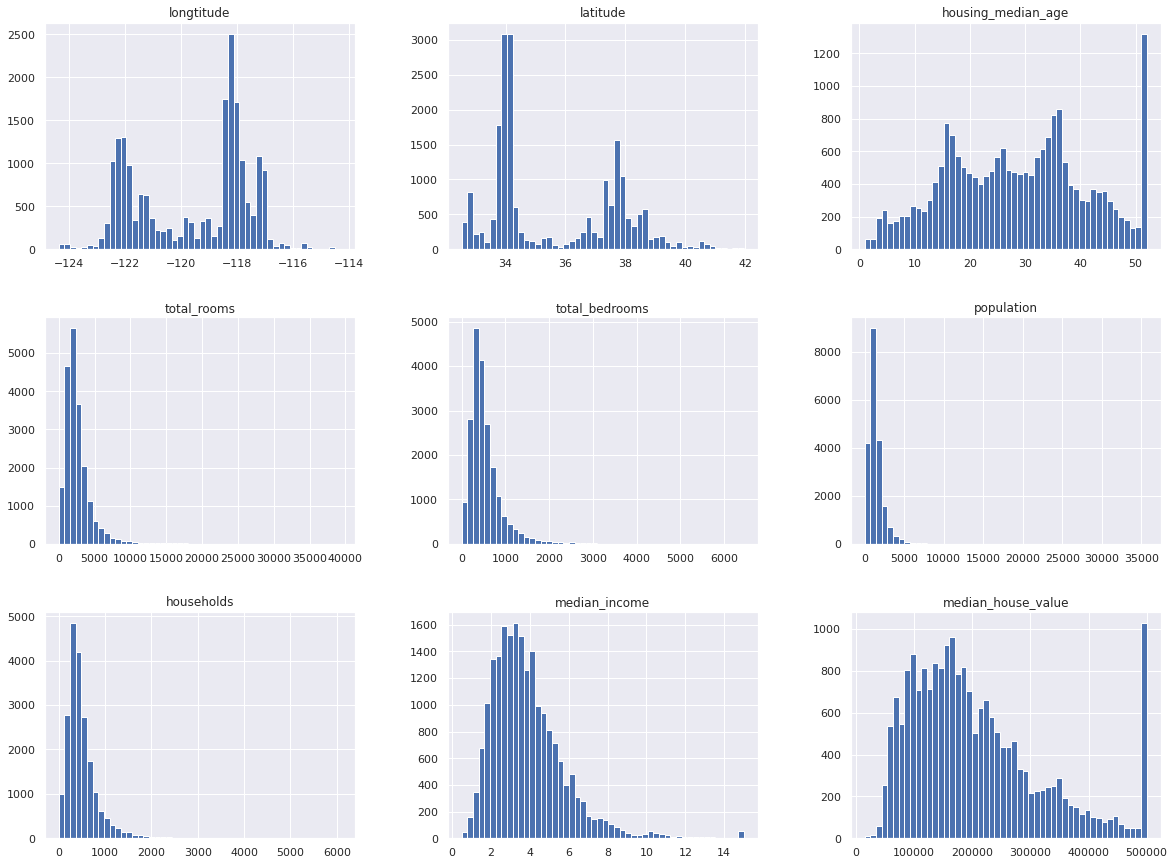

In [77]:
#Using histograms to see the distribution of various numeric columns
housing.hist(bins=50,figsize=(20,15))

#total_rooms,bedrooms,population,median_income,households form nearly a shifted Gaussian distribution

In [78]:
# classifying columns in discrete and continous

#defining lists containing columns which are discrete or continuous as the name of list_suggests
discrete_columns=[]
continuous_columns=[]

#Getting the discrete/continuous columns by iterating over all the columns of the dataset
for col in data.columns:
    if(data[col].dtypes=='object'):
        discrete_columns.append(col)
    elif(col!='ID' and col!='Region of residence'):
        continuous_columns.append(col)#getting more analysis about data distribution of continuous-columns by calculating skewness and inter-quartile range

        
for col in continuous_columns:
    
    #Printing skew for col
    print(col,'has skewness:',data[col].skew())
    
    #Printing inter-quartile range for col using 75%-25%
    print(col,'has inter-quartile range:',(np.percentile(data[col],75)-np.percentile(data[col],25)),'\n','\n')

longtitude has skewness: -0.2978012079523937
longtitude has inter-quartile range: 3.789999999999992 
 

latitude has skewness: 0.46595300370998016
latitude has inter-quartile range: 3.780000000000001 
 

housing_median_age has skewness: 0.0603306375991368
housing_median_age has inter-quartile range: 19.0 
 

total_rooms has skewness: 4.14734345063216
total_rooms has inter-quartile range: 1700.25 
 

total_bedrooms has skewness: 3.4534179963817526
total_bedrooms has inter-quartile range: 351.25 
 

population has skewness: 4.935858226727124
population has inter-quartile range: 938.0 
 

households has skewness: 3.4104377116671465
households has inter-quartile range: 325.0 
 

median_income has skewness: 1.6466567021344465
median_income has inter-quartile range: 2.17985 
 

median_house_value has skewness: 0.9777632739098341
median_house_value has inter-quartile range: 145125.0 
 



In [79]:
import math
import statistics
#Finding MLE estimates(gaussian) and log-likelihood for analyzing how close is it to gaussian distributions
for col in continuous_columns:
    data_plot=data[col]

    #log_likelihood contains likelihood for gaussian_distribution
    log_likelihood=0.000

    #MLE parameter estimate of mu
    print("MLE parameter estimate for",col,'is:',np.mean(data_plot))

    #Iterating over dataframe main_data_plotted and calculating log_likelihood 
    for i in range(len(data_plot)):
    
        #Computing square_root of 2pi
        sqrtcomponent=math.sqrt(2*math.pi)
    
        #Calculating std_deviation of dataset
        stdev=statistics.stdev(data_plot)
    
        #Calculating log(std_dev*2pi)
        log_stdev=math.log(statistics.stdev(data_plot)*sqrtcomponent +0.0001)+0.50000
    
        #Adding value of components for this datapoint
        log_likelihood+=log_stdev
    
    #Printing Gaussian log likelihood
    print("Log Likelihood of gaussian for",col,'is:',-log_likelihood)

MLE parameter estimate for longtitude is: -119.56970445736435


KeyboardInterrupt: 

In [80]:
#analyzing correlation between various continuous_columns
corr=data.corr()

#Viewing the correlation matrix
corr

#We see a strong corrlation between longtitude,latitude;also between population,total_bedrooms,total_rooms,households; also between median_income and median_house value

,longtitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longtitude,1.000000,-0.924664,-0.108197,0.044568,0.068880,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066458,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.321178,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930463,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.068880,-0.066458,-0.321178,0.930463,1.000000,0.877736,0.978681,-0.007043,0.050252
population,0.099773,-0.108785,-0.296244,0.857126,0.877736,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.978681,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007043,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.050252,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

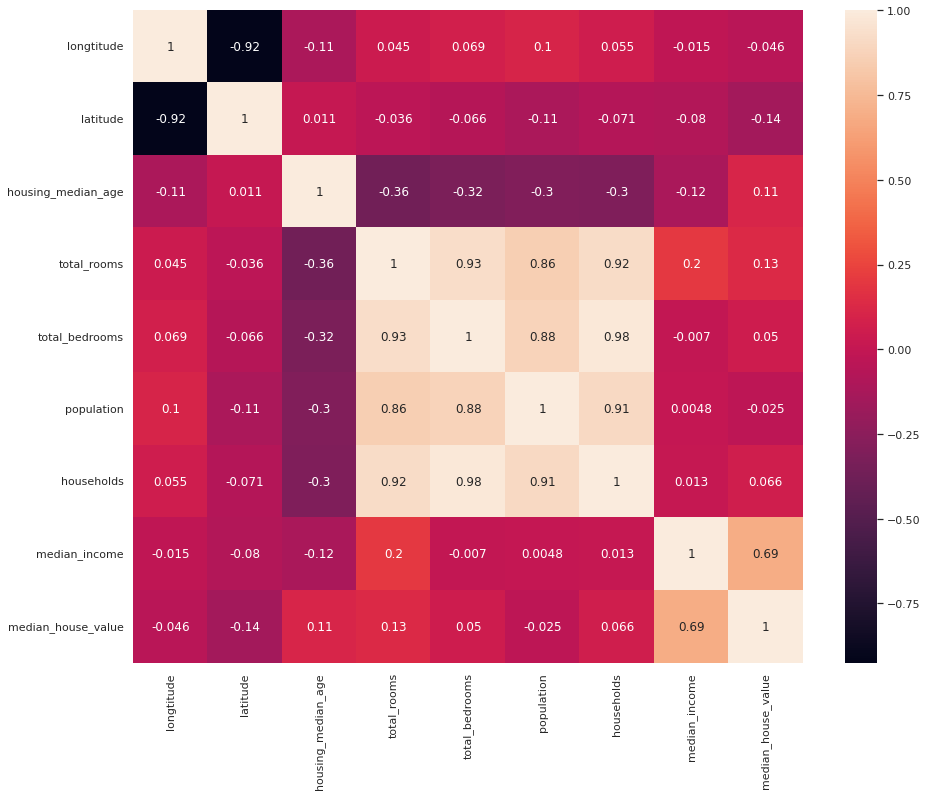

In [81]:
#Using heatmap to analyze the correlation visually
#Setting appropriate figsize so that visuality is clear
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(corr,annot=True)

In [82]:
corr_matrix=data.corr()

#Seeing correlation of various columns with respect to target variable 'median_house_value'
corr_matrix["median_house_value"].sort_values(ascending=True)

#Median_income and median_house_value have a strong correlation

latitude             -0.144160
longtitude           -0.045967
population           -0.024650
total_bedrooms        0.050252
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [83]:
dataa=data.copy()

#Creating another dataframe which will have encoded object columns so that they can also be used as an input 
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longtitude          20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

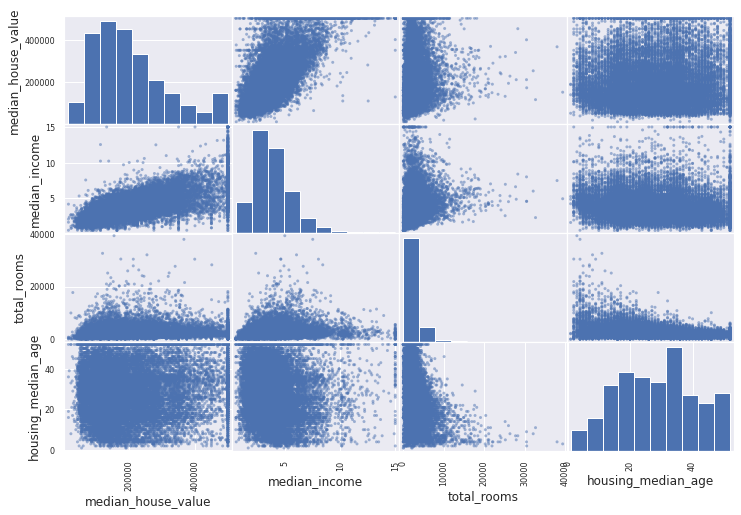

In [84]:
#Deciding the important attributes which might be very helpful for price predictions
imp_attributes=["median_house_value","median_income","total_rooms","housing_median_age"]

#Drawing scatter matrix to get more better visualized analysis
pd.plotting.scatter_matrix(housing[imp_attributes],figsize=(12,8))


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

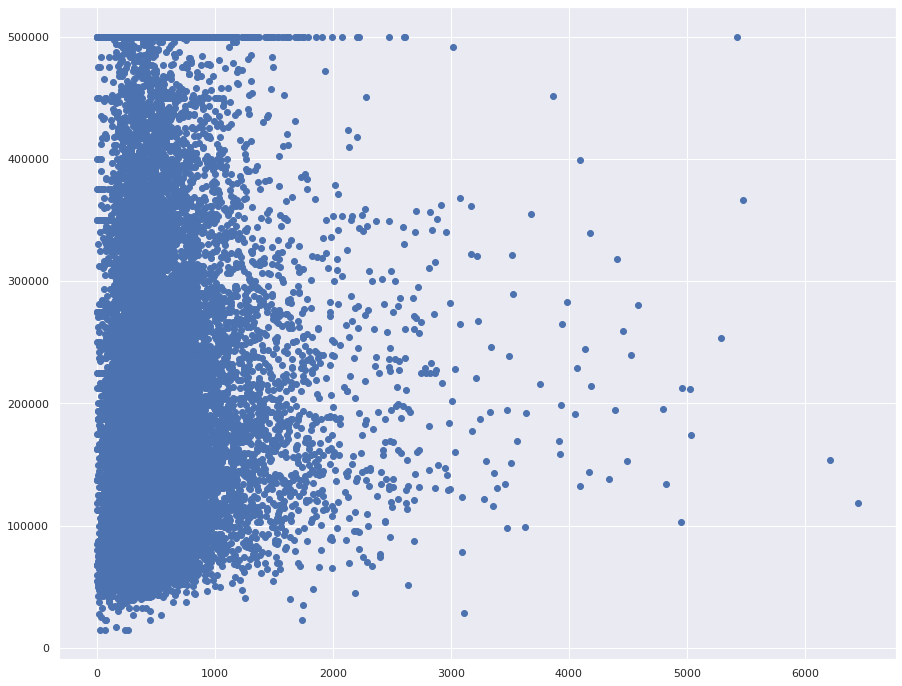

In [85]:
plt.scatter(x=dataa['total_bedrooms'],y=dataa['median_house_value'])
dataa['ocean_proximity'].value_counts()

In [86]:
#Extracting new_features which are intutively helpful for price prediction
dataa["population_per_household"]=dataa["population"]/dataa["households"]
dataa["rooms_per_household"]=dataa["total_rooms"]/dataa["households"]
dataa["bedrooms_per_room"]=dataa["total_bedrooms"]/dataa["total_rooms"]
dataa["bedrooms_per_household"]=dataa["total_bedrooms"]/dataa["households"]

data["population_per_household"]=data["population"]/data["households"]
data["rooms_per_household"]=data["total_rooms"]/data["households"]
data["bedrooms_per_room"]=data["total_bedrooms"]/data["total_rooms"]
data["bedrooms_per_household"]=data["total_bedrooms"]/data["households"]


#Encoding object data-types to numeric for appropriately utilizing them for regression problem
housing_cat=dataa["ocean_proximity"]
housing_cat_encoded,housing_categories=housing_cat.factorize()

data=data.drop(['ocean_proximity'],axis=1)

In [98]:
#Seeing correlation after extracting new features
corr_matrix=dataa.corr()

#Seeing correlation with repect to 'median_house_value' which is our target variable
corr_matrix["median_house_value"].sort_values(ascending=True)


bedrooms_per_room          -0.256627
latitude                   -0.144160
bedrooms_per_household     -0.046737
longtitude                 -0.045967
population                 -0.024650
population_per_household   -0.023737
total_bedrooms              0.050252
households                  0.065843
housing_median_age          0.105623
total_rooms                 0.134153
rooms_per_household         0.151948
median_income               0.688075
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [100]:
#Encoding 'ocean_proximity'
dafa=dataa.drop("ocean_proximity",axis=1)

housing_cat=pd.DataFrame(housing_cat_encoded)
dafa["ocean_logic"]=housing_cat_encoded
dafat=dafa.copy()
dafat.head()

,longtitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,population_per_household,rooms_per_household,bedrooms_per_room,bedrooms_per_household,ocean_logic
0,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,3.000000,1.000000,1.000000,1.000000,0
1,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,4.000000,3.000000,0.333333,1.000000,0
2,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,13.000000,8.000000,0.125000,1.000000,0
3,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,1.846154,0.846154,1.000000,0.846154,0
4,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,2.571429,1.714286,0.333333,0.571429,0


In [101]:

#Some more feature extraction
dafat["room_quality"]=dafat["median_income"]/dafat["total_rooms"]
dafat["people_attitude"]=((dafat["median_income"]*dafat["households"])/dafat["population"])
dafat["bedroom_quality"]=((dafat["median_income"]/dafat["total_bedrooms"])*100)

data["room_quality"]=data["median_income"]/data["total_rooms"]
data["people_attitude"]=((data["median_income"]*data["households"])/data["population"])
data["bedroom_quality"]=((data["median_income"]/data["total_bedrooms"])*100)

In [102]:
dafat.corr()

,longtitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,population_per_household,rooms_per_household,bedrooms_per_room,bedrooms_per_household,ocean_logic,room_quality,people_attitude,bedroom_quality
longtitude,1.000000,-0.924664,-0.108197,0.044568,0.068880,0.099773,0.055310,-0.015176,-0.045967,0.002476,-0.027540,0.092987,0.013288,0.011578,-0.012792,-0.068664,-0.018819
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066458,-0.108785,-0.071035,-0.079809,-0.144160,0.002366,0.106389,-0.113601,0.070133,-0.015143,0.006998,-0.029887,0.010975
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.321178,-0.296244,-0.302916,-0.119034,0.105623,0.013191,-0.153277,0.136504,-0.077773,-0.084894,0.025546,-0.071570,0.022913
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930463,0.857126,0.918484,0.198050,0.134153,-0.024581,0.133798,-0.189361,0.028608,0.209184,-0.094397,0.201818,-0.071978
total_bedrooms,0.068880,-0.066458,-0.321178,0.930463,1.000000,0.877736,0.978681,-0.007043,0.050252,-0.028286,0.001819,0.082650,0.045318,0.203047,-0.104102,0.054114,-0.084348
population,0.099773,-0.108785,-0.296244,0.857126,0.877736,1.000000,0.907222,0.004834,-0.024650,0.069863,-0.072213,0.034279,-0.067422,0.183714,-0.086592,-0.075455,-0.071773
households,0.055310,-0.071035,-0.302916,0.918484,0.978681,0.907222,1.000000,0.013033,0.065843,-0.027309,-0.080598,0.062937,-0.056787,0.203514,-0.104673,0.062572,-0.084379
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007043,0.004834,0.013033,1.000000,0.688075,0.018766,0.326895,-0.614566,-0.060600,0.065370,0.103350,0.892193,0.130776
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.050252,-0.024650,0.065843,0.688075,1.000000,-0.023737,0.151948,-0.256627,-0.046737,0.052679,0.041348,0.745628,0.057597
population_per_household,0.002476,0.002366,0.013191,-0.024581,-0.028286,0.069863,-0.027309,0.018766,-0.023737,1.000000,-0.004852,0.003103,-0.006060,-0.028223,0.206836,-0.057874,0.129348


In [103]:
#Checking the encoding values
dafat["ocean_logic"].value_counts()

1    9136
2    6551
3    2658
0    2290
4       5
Name: ocean_logic, dtype: int64

In [108]:
final_data=dafat
final_data.info()

for col in final_data.columns:
    final_data[col]=((final_data[col]-min(final_data[col]))/(max(final_data[col])-min(final_data[col])))
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longtitude                20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   population_per_household  20640 non-null  float64
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  bedrooms_per_household    20640 non-null  float64
 13  ocean_logic               20640 non-null  int64  
 14  room_q

In [109]:
final_data.describe()

,longtitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,population_per_household,rooms_per_household,bedrooms_per_room,bedrooms_per_household,ocean_logic,room_quality,people_attitude,bedroom_quality
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083273,0.039869,0.081983,0.232464,0.395579,0.001914,0.032488,0.125597,0.022633,0.366182,0.001509,0.185650,0.000982
std,0.199555,0.226988,0.246776,0.055486,0.065256,0.031740,0.062873,0.131020,0.237928,0.008358,0.017539,0.064301,0.014062,0.213557,0.009773,0.100114,0.007964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045740,0.021974,0.045881,0.142308,0.215671,0.001398,0.025482,0.083869,0.019934,0.250000,0.000517,0.114221,0.000287
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301,0.339588,0.001711,0.031071,0.114659,0.021214,0.250000,0.000826,0.170685,0.000504
75%,0.631474,0.549416,0.705882,0.080014,0.100248,0.048264,0.099326,0.292641,0.514897,0.002084,0.036907,0.155316,0.022727,0.500000,0.001322,0.234377,0.000872
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
data.info()

for col in data.columns:
    data[col]=((data[col]-min(data[col]))/(max(data[col])-min(data[col])))
    
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longtitude                20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   population_per_household  20640 non-null  float64
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  bedrooms_per_household    20640 non-null  float64
 13  room_quality              20640 non-null  float64
 14  people

In [111]:
data.describe()

,longtitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,population_per_household,rooms_per_household,bedrooms_per_room,bedrooms_per_household,room_quality,people_attitude,bedroom_quality
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083273,0.039869,0.081983,0.232464,0.395579,0.001914,0.032488,0.125597,0.022633,0.001509,0.185650,0.000982
std,0.199555,0.226988,0.246776,0.055486,0.065256,0.031740,0.062873,0.131020,0.237928,0.008358,0.017539,0.064301,0.014062,0.009773,0.100114,0.007964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045740,0.021974,0.045881,0.142308,0.215671,0.001398,0.025482,0.083869,0.019934,0.000517,0.114221,0.000287
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301,0.339588,0.001711,0.031071,0.114659,0.021214,0.000826,0.170685,0.000504
75%,0.631474,0.549416,0.705882,0.080014,0.100248,0.048264,0.099326,0.292641,0.514897,0.002084,0.036907,0.155316,0.022727,0.001322,0.234377,0.000872
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=15)

for train_index,test_index in split.split(final_data,final_data['ocean_logic']):
    strat_train_set=final_data.iloc[train_index]
    strat_test_set=final_data.iloc[test_index]

    
training_set,test_set=train_test_split(data,test_size=0.3,random_state=7)

y_train=training_set["median_house_value"]
y_test=test_set["median_house_value"]
x_train=training_set.drop(["median_house_value"],axis=1)
x_test=test_set.drop(["median_house_value"],axis=1)

In [113]:
strat_test_set.head()

,longtitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,population_per_household,rooms_per_household,bedrooms_per_room,bedrooms_per_household,ocean_logic,room_quality,people_attitude,bedroom_quality
5822,0.584661,0.158342,0.745098,0.038863,0.062073,0.030018,0.061503,0.207425,0.756288,0.001748,0.022925,0.180102,0.021818,0.25,0.001185,0.161304,0.000560
9239,0.722112,0.022317,0.196078,0.050206,0.084885,0.042742,0.084032,0.068185,0.154228,0.001845,0.021361,0.197031,0.021847,0.50,0.000364,0.065049,0.000158
13997,0.162351,0.673751,0.549020,0.070680,0.072522,0.024861,0.050814,0.102805,0.168249,0.001753,0.057597,0.076005,0.034904,0.50,0.000344,0.090847,0.000260
12467,0.603586,0.145590,0.784314,0.062897,0.082402,0.039603,0.077125,0.230155,0.291547,0.001867,0.031332,0.127722,0.023673,0.50,0.000789,0.167792,0.000458
10823,0.234064,0.561105,0.372549,0.056056,0.070919,0.025870,0.070877,0.283051,0.497732,0.001168,0.030202,0.119573,0.021547,0.25,0.001075,0.283724,0.000647


In [114]:
y_train1=strat_train_set["median_house_value"]
y_test1=strat_test_set["median_house_value"]
x_train1=strat_train_set.drop(["median_house_value"],axis=1)
x_test1=strat_test_set.drop(["median_house_value"],axis=1)

In [115]:
#Making our final model
model_linear_final=LinearRegression()

model_linear_final.fit(x_train,y_train)

#Testing our model to understand it's usablity
print('LR model has score on test set',100*model_linear_final.score(x_test,y_test))


#Making our final model
model_linear_final1=LinearRegression()

model_linear_final1.fit(x_train1,y_train1)

#Testing our model to understand it's usablity
print('LR model has score on test set',100*model_linear_final1.score(x_test1,y_test1))


LR model has score on test set 67.26330495536038
LR model has score on test set 66.43195282333659


In [118]:
model_tree=DecisionTreeRegressor()

#Making a search_space for GridSearch of various hyperparameters 
space_tree={'max_depth':[10,25,50,75,100],'min_samples_split':[5,8,10,12]}
search_tree=GridSearchCV(model_tree,space_tree,scoring='neg_mean_squared_error',cv=5)

#Searching using cross-validation based testing 
result_tree=search_tree.fit(x_train,y_train)

#Printing the best_hyper-parameters found using the above search
print(result_tree.best_params_,'leads to scoring result:',result_tree.best_score_)



model_tree1=DecisionTreeRegressor()

#Making a search_space for GridSearch of various hyperparameters 
space_tree1={'max_depth':[10,25,50,75,100],'min_samples_split':[5,8,10,12]}
search_tree1=GridSearchCV(model_tree1,space_tree1,scoring='neg_mean_squared_error',cv=5)

#Searching using cross-validation based testing 
result_tree1=search_tree1.fit(x_train1,y_train1)

#Printing the best_hyper-parameters found using the above search
print(result_tree1.best_params_,'leads to scoring result:',result_tree1.best_score_)







#Testing basic DecisionTree Regressor models
model_tree=result_tree.best_estimator_
model_tree.fit(x_train,y_train)
print(model_tree.score(x_test,y_test))

#Testing basic DecisionTree Regressor models
model_tree1=result_tree1.best_estimator_
model_tree1.fit(x_train1,y_train1)
print(model_tree1.score(x_test1,y_test1))

{'max_depth': 10, 'min_samples_split': 12} leads to scoring result: -0.01678027073239862
{'max_depth': 10, 'min_samples_split': 12} leads to scoring result: -0.016399606993890835
0.7381561001071083
0.7222536583539849


In [119]:
model_knn=KNeighborsRegressor()
space_knn={'leaf_size':[3,5,7,8,10,15],'n_neighbors':[3,5,7,10]}
search_knn=GridSearchCV(model_knn,space_knn,scoring='neg_mean_squared_error',cv=5)
result_knn=search_knn.fit(x_train,y_train)

print(result_knn.best_params_,'leads to scoring result:',result_knn.best_score_)





model_knn1=KNeighborsRegressor()
space_knn1={'leaf_size':[3,5,7,8,10,15],'n_neighbors':[3,5,7,10]}
search_knn1=GridSearchCV(model_knn1,space_knn1,scoring='neg_mean_squared_error',cv=5)
result_knn1=search_knn1.fit(x_train1,y_train1)

print(result_knn1.best_params_,'leads to scoring result:',result_knn1.best_score_)





model_neighbor=result_knn.best_estimator_
model_neighbor.fit(x_train,y_train)
print(model_neighbor.score(x_test,y_test))


model_neighbor1=result_knn1.best_estimator_
model_neighbor1.fit(x_train1,y_train1)
print(model_neighbor1.score(x_test1,y_test1))

{'leaf_size': 3, 'n_neighbors': 10} leads to scoring result: -0.014317188399799152
{'leaf_size': 3, 'n_neighbors': 10} leads to scoring result: -0.01565245340872695
0.7621259180660476
0.7279260445604591


In [ ]:
model_forest=RandomForestRegressor()

#Making a search_space for GridSearch of various hyperparameters 
space_forest={'n_estimators':[25,50,75,100,200],'max_depth':[10,25,50,75,100],'max_features':[3,4,5],'min_samples_split':[5,8,10,12]}
search_forest=GridSearchCV(model_forest,space_forest,scoring='neg_mean_squared_error',cv=5)

#Searching using cross-validation based testing 
result_forest=search_forest.fit(x_train,y_train)

#Printing the best_hyper-parameters found using the above search
print(result_forest.best_params_,'leads to scoring result:',result_forest.best_score_)





model_forest1=RandomForestRegressor()

#Making a search_space for GridSearch of various hyperparameters 
space_forest1={'n_estimators':[25,50,75,100,200],'max_depth':[10,25,50,75,100],'max_features':[3,4,5],'min_samples_split':[5,8,10,12]}
search_forest1=GridSearchCV(model_forest1,space_forest1,scoring='neg_mean_squared_error',cv=5)

#Searching using cross-validation based testing 
result_forest1=search_forest1.fit(x_train1,y_train1)

#Printing the best_hyper-parameters found using the above search
print(result_forest1.best_params_,'leads to scoring result:',result_forest1.best_score_)


#Making our final model
model_forest_final=result_forest.best_estimator_
model_forest_final.fit(x_train,y_train)

#Testing our model to understand it's usablity
print('RFR model has score on test set',100*model_forest_final.score(x_test,y_test))


#Making our final model
model_forest_final1=result_forest1.best_estimator_
model_forest_final1.fit(x_train1,y_train1)

#Testing our model to understand it's usablity
print('RFR model has score on test set',100*model_forest_final1.score(x_test1,y_test1))





In [117]:
model_svm=SVR()

space_svm={'C':[1,5,10,15,20,25,50],'gamma':[0.001,0.0001],'kernel':['rbf']}
search_svm=GridSearchCV(model_svm,space_svm,scoring='neg_mean_squared_error',cv=5)
result_svm=search_svm.fit(x_train,y_train)

print(result_svm.best_params_,'leads to scoring result:',result_svm.best_score_)


model_svm_final=result_svm.best_estimator_
model_svm_final.fit(x_train,y_train)
print('SVR model has score on test set',100*model_svm_final.score(x_test,y_test))



model_svm1=SVR()

space_svm1={'C':[1,5,10,15,20,25,50],'gamma':[0.001,0.0001],'kernel':['rbf']}
search_svm1=GridSearchCV(model_svm1,space_svm1,scoring='neg_mean_squared_error',cv=5)
result_svm1=search_svm1.fit(x_train1,y_train1)

print(result_svm1.best_params_,'leads to scoring result:',result_svm1.best_score_)


model_svm_final1=result_svm1.best_estimator_
model_svm_final1.fit(x_train1,y_train1)
print('SVR model has score on test set',100*model_svm_final1.score(x_test1,y_test1))


{'C': 50, 'gamma': 0.001, 'kernel': 'rbf'} leads to scoring result: -0.018713243854283815
SVR model has score on test set 67.73069063510994
{'C': 50, 'gamma': 0.001, 'kernel': 'rbf'} leads to scoring result: -0.01860893803926219
SVR model has score on test set 66.26887634204884
